# Confidence Interval

## Dependency

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from matplotlib.patches import Polygon
plt.style.use('default')

## Concept

**Confidence interval** is the probability that an unknown population parameter falls within a range of values in repeated samples. It's the proportion of a large number of samples that will include the population parameter within its confidence interval. 

$L$ is a lower boundary. $U$ is a upper boundary. $c$ is proportion of confidence interval. $\mu$ is population mean.

$$
P(L < \mu < U) = c
$$
$$
c = \{ 0.95, 0.99, 0.9 \}
$$

Factors that influence confidence intervals

- When sample size is larger, confidence intervals gets narrower
- When the variance is smaller, confidence intervals get narrower

$\bar{x}$ is sample mean. $t^*$ is t-value with $k$ degrees of freedom. $s$ is sample standard deviation. $n$ is sample size.

$$
\text{C.I.} = \bar{x} \pm t^* (k) \frac{s}{\sqrt{n}}
$$
$$
t^* = tinv(\frac{1 - C}{2}, n - 1) = \frac{1 - C}{2}
$$
$$
C = 0.95
$$

Assumptions

- $s$ is an appropriate measure of variability

## Bootstrapping

Pretend that our sample is the population and the resampling is the sample by repeatedly randomly resampling from our dataset. and compute C.I. directly based on the data.

**Resample with replacement**

## Interpretation

- 95% of confidence intervals in repeated samples will contain the true population mean.
- Confidence refers to the estimate, not to the population parameter.
- Confidence interval is not based on the raw data; it's based on the descriptive statistics of the sample data.
- Confidence interval refers to the estimate of a parameter, not to the relationship between parameters.

In [4]:
# 131. Code: compute confidence intervals by formula

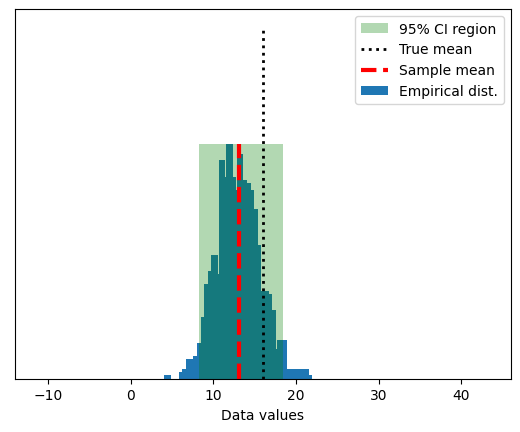

Empirical: 8.26 - 18.39
Analytic: 7.63 - 18.49


In [34]:
n = int(1e7)

population = (4 * np.random.randn(n)) ** 2
population_mean = np.mean(population)

sample_size = 40
confidence = 95

rand_samples = np.random.randint(low=0, high=n, size=sample_size)
sample_data = population[rand_samples]
sample_mean = np.mean(population[rand_samples])
sample_std = np.std(population[rand_samples], ddof=1)

num_boots = 1000
boot_means = np.zeros(num_boots)

for boot_i in range(num_boots):
    boot_means[boot_i] = np.mean(np.random.choice(sample_data, sample_size))

confint = [0, 0]
confint[0] = np.percentile(boot_means, (100 - confidence) / 2)
confint[1] = np.percentile(boot_means, 100 - (100 - confidence) / 2)

fig, ax = plt.subplots(1, 1)

y, x = np.histogram(boot_means, 40)
y = y / max(y)
x = (x[:-1] + x[1:]) / 2
ax.bar(x, y)

y = np.array([
    [confint[0], 0],
    [confint[1], 0],
    [confint[1], 1],
    [confint[0], 1]
])
p = Polygon(y, facecolor='g', alpha=.3)
ax.add_patch(p)

ax.plot([population_mean, population_mean], [0, 1.5], 'k:', linewidth=2)
ax.plot([sample_mean, sample_mean], [0, 1], 'r--', linewidth=3)
ax.set_xlim([population_mean - 30, population_mean + 30])
ax.set_yticks([])
ax.set_xlabel('Data values')
ax.legend((
    f'{confidence}% CI region',
    'True mean',
    'Sample mean',
    'Empirical dist.'
))

plt.show()

citmp = (1 - confidence / 100) / 2
confint2 = sample_mean + stats.t.ppf([citmp, 1 - citmp], sample_size - 1) * sample_std / np.sqrt(sample_size)

print(f'Empirical: {confint[0]:.2f} - {confint[1]:.2f}')
print(f'Analytic: {confint2[0]:.2f} - {confint2[1]:.2f}')